In [108]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [109]:
#Load Image
def read_file(filename):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    return img

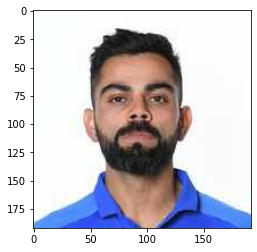

In [110]:
filename = "download.jpg"
img = read_file(filename)

org_img = np.copy(img)

In [111]:
#Create Edge Mask
def edge_mask(img, line_size, blur_value):
    """
    input: Input Image
    Output: Edges of Image
    """
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray_blur = cv2.medianBlur(gray, blur_value)

    edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)
    return edges

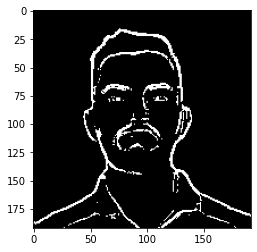

In [112]:
line_size, blur_value = 5,7
edges = edge_mask(img, line_size, blur_value)

plt.imshow(edges, cmap="binary")
plt.show()

In [113]:
#Reduce the Color Palette
def color_quantizaion(img, k):
    # Transform the image
    data = np.float32(img).reshape((-1,3))

    #Determine Criteria
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)

    # Implementing K-Means
    ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)

    result = center[label.flatten()]
    result = result.reshape(img.shape)

    return result

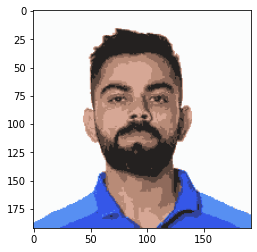

In [114]:
img = color_quantizaion(img, k=9)

plt.imshow(img)
plt.show()

In [115]:
#Reduce the noise

# blurred = cv2.bilateralFilter(img, d=3, sigmaColor=200, sigmaSpace=200)

# plt.imshow(blurred)
# plt.show()

In [116]:
# Combine Edge Mask with the quantiz img
def cartoon():
    c = cv2.bilateralFilter(img, d=3, sigmaColor=200, sigmaSpace=200)

    plt.imshow(org_img)
    plt.title("Original Image")
    plt.show()

    plt.imshow(c)
    plt.title("Cartoonified Image")
    plt.show()


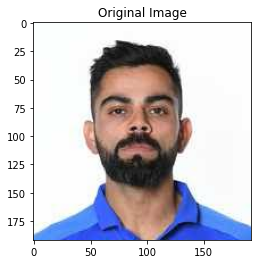

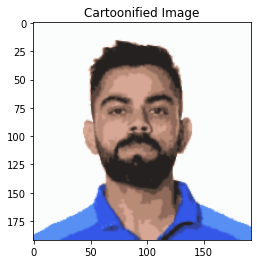

In [117]:
cartoon()